<a href="https://colab.research.google.com/github/awarbler/CSE450AWF23/blob/main/M02W03AJstarter_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Answer these questions

### who subscribed to a term deposit.

Do you think a supervised or unsupervised approach would work best for this situation

build a targeted marketing campaign that focuses primarily on those customers.

One other thing we should probably address, does contacting people too frequently for these marketing campaigns have an adverse affect on the outcome?



#### 37,000 records.
How much of that data will you use to train your model?

A simple 80/20 split will provide us with enough to accurately train and test our model.

insights we could gain from our data.

some days of the week or some months produce better results than others.

those results are true for all customers, or if some types of customers respond better on certain days than others?

Should we only call single people on Saturdays? Does it make sense to call students at all?

# Data


## bank client data:

age (numeric)

job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

default: has credit in default? (categorical: "no","yes","unknown")

housing: has housing loan? (categorical: "no","yes","unknown")

loan: has personal loan? (categorical: "no","yes","unknown")



## related with the last contact of the current campaign:

contact: contact communication type (categorical: "cellular","telephone")

month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")



## other attributes:

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

previous: number of contacts performed before this campaign and for this client (numeric)

poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")



## social and economic context attributes

emp.var.rate: employment variation rate - quarterly indicator (numeric)

cons.price.idx: consumer price index - monthly indicator (numeric)

cons.conf.idx: consumer confidence index - monthly indicator (numeric)

euribor3m: euribor 3 month rate - daily indicator (numeric)

nr.employed: number of employees - quarterly indicator (numeric)



## Output variable (desired target):

y - has the client subscribed a term deposit? (binary: "yes","no")



## Missing Attribute Values

There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

# Things to do


# Module 1 Review

1. Preprocess Data
2. Train/Test Split Data
3. Model -> Fit -> Predict
4. Evaluate Performance

# Preprocess Data
* Import the Data
* Evaluate the quality
* Address quality issues
* Feature engineering

In [1]:
# Enter your code below to import Pandas according to the
# conventional method. Then load the dataset into a Pandas dataframe.from pathlib import Path
import pandas as pd
import altair as alt
import numpy as py
import seaborn as sn
import matplotlib.pyplot as plt
import graphviz
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from typing_extensions import dataclass_transform
from scipy.stats import randint
from IPython.display import Image
from sklearn.datasets import load_iris

import os
os.environ["COLUMNS"] = "74" # output width, in characters
pd.set_option("display.width", 74)

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

## Evaluate the quality

### Checking Values

What does the data look like?
What kind of data is in each column?
Do any of the columns have missing values?

In [ ]:
# Write any code needed to explore the data by seeing what the first few
# rows look like. Then display a technical summary of the data to determine
# the data types of each column, and which columns have missing data.

In [2]:
#look at the file I read in
campaign.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
#What kind of data is in each column?
# look at the columns to see about non null and types
campaign.info()
# no empty columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             37069 non-null  object 
 2   marital         37069 non-null  object 
 3   education       37069 non-null  object 
 4   default         37069 non-null  object 
 5   housing         37069 non-null  object 
 6   loan            37069 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  campaign        37069 non-null  int64  
 11  pdays           37069 non-null  int64  
 12  previous        37069 non-null  int64  
 13  poutcome        37069 non-null  object 
 14  emp.var.rate    37069 non-null  float64
 15  cons.price.idx  37069 non-null  float64
 16  cons.conf.idx   37069 non-null  float64
 17  euribor3m       37069 non-null 

In [4]:
# look at describe () to see count and mean std min and what not
#We use the method describe to obtain a statistical summary of the dataframe.
# .describe()but describe (include='all') works better we can see all of the NaN fields
campaign.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,37069.000000,37069,37069,37069,37069,37069,37069,37069,37069,37069,37069.000000,37069.000000,37069.000000,37069,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,9400,22456,10949,29341,19474,30590,23515,12370,7742,NaN,NaN,NaN,31988,NaN,NaN,NaN,NaN,NaN,32861
mean,40.025493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.564407,962.221803,0.173730,NaN,0.081526,93.576551,-40.494829,3.621945,5167.010650,NaN
std,10.435288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.764084,187.531477,0.496159,NaN,1.572287,0.579339,4.628895,1.734496,72.294476,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [5]:
# Do any of the columns have missing values? No missing values just NaN
campaign.nunique()
# 'age','job', 'marital', 'month', campaign, pdays, , euribor3m,

age                78
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
campaign           41
pdays              27
previous            8
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         314
nr.employed        11
y                   2
dtype: int64

In [6]:
# check for duplicates in our data
campaign.duplicated().sum()
# how do we want to handle duplicates?
# Our data shows there are 1487 duplicates
# Do we want to drop them? If so # Removing Duplicate Values
#campaign = campaign.drop_duplicates()

1487

In [7]:
# identify null values
#checking to see how many rows are null -
campaign.isnull().sum()
# use .isna is better to count the total number of null values in each column
campaign.isna().sum()
# none

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Info Customer wants to see

In [8]:
print(campaign.shape) # prints data shape
print(campaign.columns) # print columns

(37069, 20)
Index(['age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [9]:
# values for 'y' is yes and no. count all y
# how many people(client) have subscribed to a term deposit?
campaign['y'].value_counts()

no     32861
yes     4208
Name: y, dtype: int64

In [10]:
#
campaign["y"].value_counts()/len(campaign.y)

no     0.886482
yes    0.113518
Name: y, dtype: float64

The distribution of the target variables(y) 32861 - no and 4208- yes which is broken down to 88 % saying no and 11 % saying yes

array([<Axes: title={'center': 'no'}>, <Axes: title={'center': 'yes'}>],
      dtype=object)

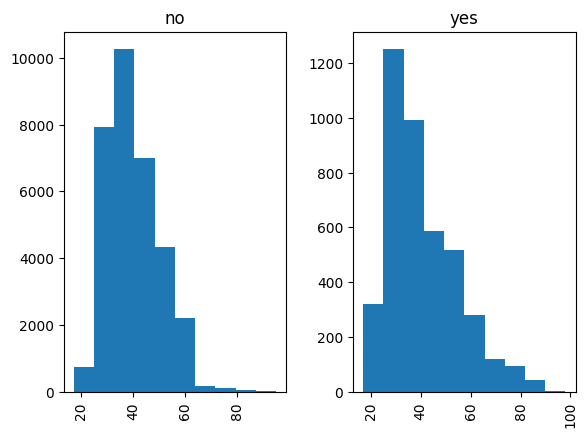

In [11]:
# @title
campaign.hist('age','y',)
# looks like from 25 - 40 said yes and said no

array([<Axes: title={'center': 'no'}>, <Axes: title={'center': 'yes'}>],
      dtype=object)

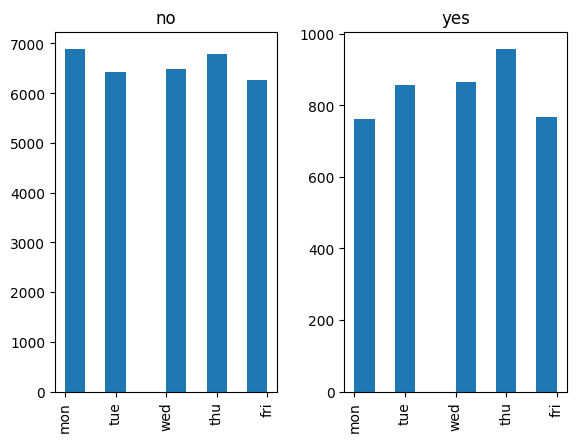

In [12]:
campaign.hist('day_of_week','y')
# I think we need to add saturday to the mix
# people said yes on thursday wed, tuesdays fridays then mondays

array([<Axes: title={'center': 'no'}>, <Axes: title={'center': 'yes'}>],
      dtype=object)

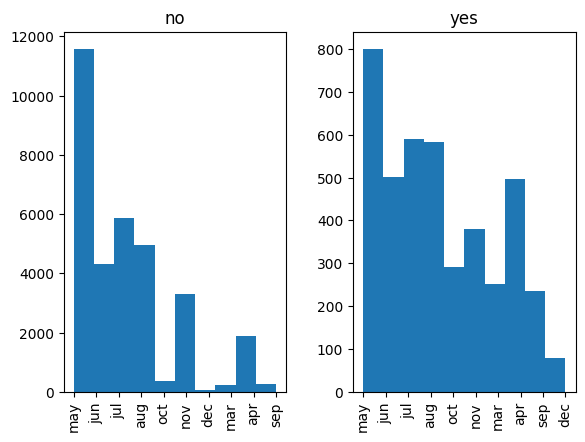

In [13]:
campaign.hist('month','y')
# monthly yes may july aug nov and april

array([<Axes: title={'center': 'no'}>, <Axes: title={'center': 'yes'}>],
      dtype=object)

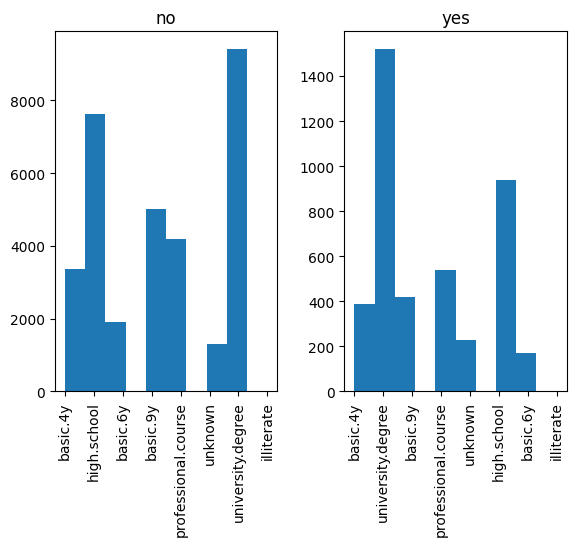

In [14]:
campaign.hist('education','y')
# people with a university degree said yes and high school education

array([<Axes: title={'center': 'no'}>, <Axes: title={'center': 'yes'}>],
      dtype=object)

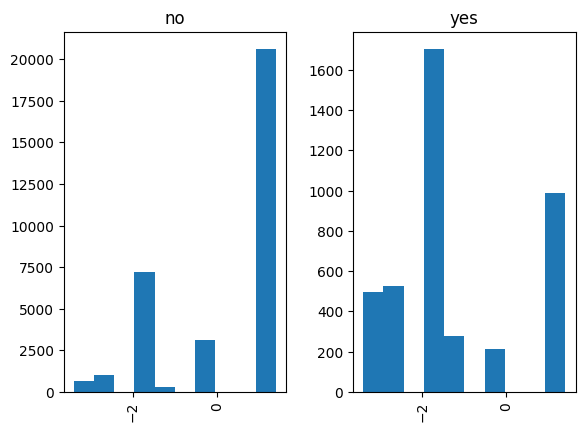

In [15]:
campaign.hist('emp.var.rate','y')

array([<Axes: title={'center': 'no'}>, <Axes: title={'center': 'yes'}>],
      dtype=object)

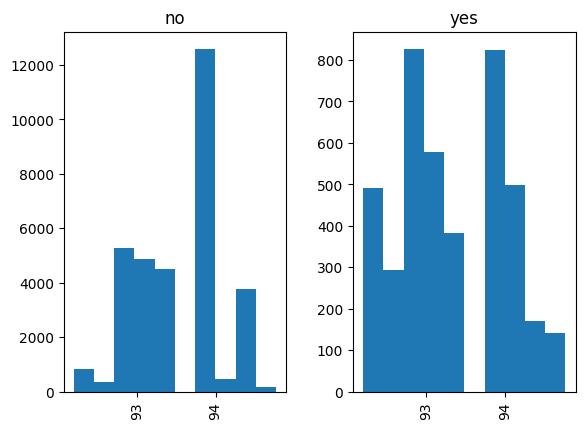

In [16]:
campaign.hist('cons.price.idx','y')

array([<Axes: title={'center': 'no'}>, <Axes: title={'center': 'yes'}>],
      dtype=object)

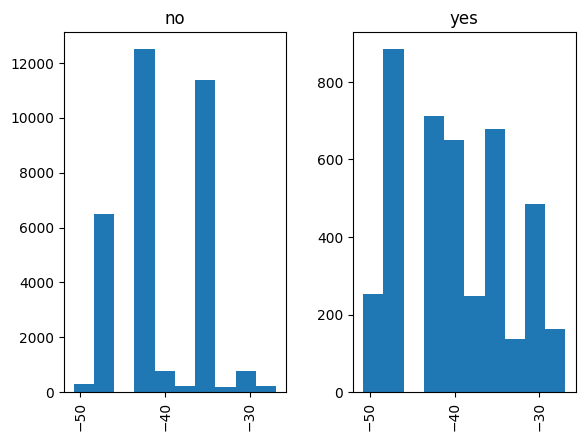

In [17]:
campaign.hist('cons.conf.idx','y')

array([<Axes: title={'center': 'no'}>, <Axes: title={'center': 'yes'}>],
      dtype=object)

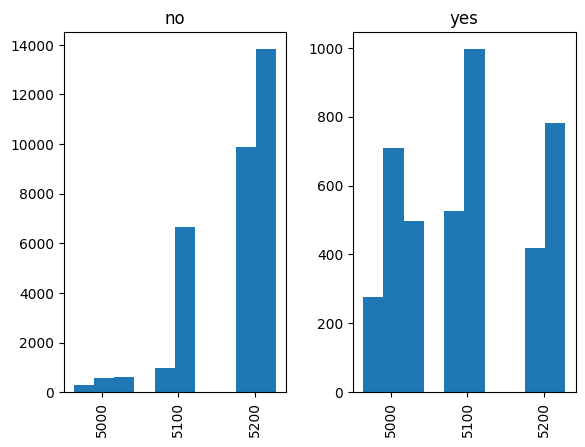

In [ ]:
campaign.hist('nr.employed','y')

<ipython-input-18-d2fa43d20360>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = campaign.corr()


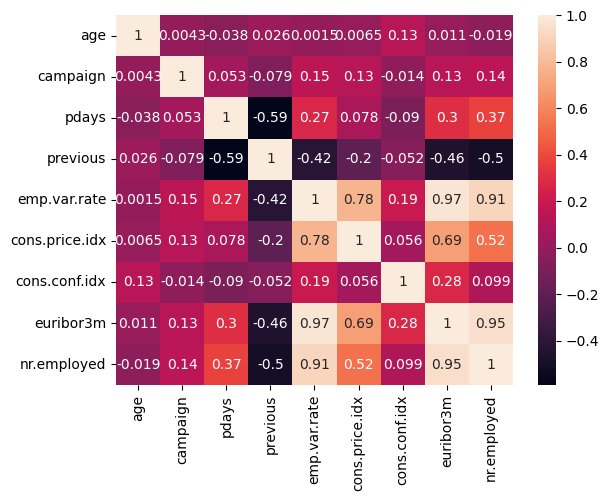

In [18]:
# view the correlation between features -- values between -1 and 1 compare itself against itself
# too hard to read figure out how to get a better print. [1]
# corralation between each feature
corrMatrix = campaign.corr()
sn.heatmap(corrMatrix, annot=True) # do we run false or true
plt.show()
# we need to understand correlation

<ipython-input-19-90a66431df92>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = campaign.corr()


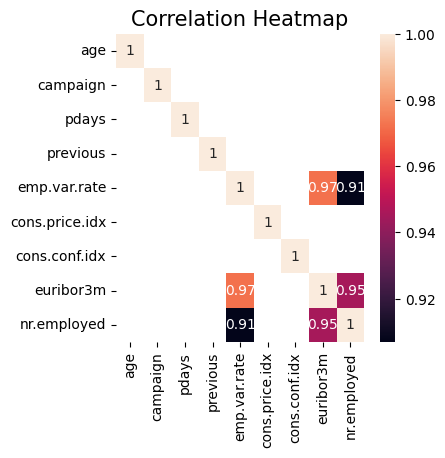

In [19]:
# plotting the heatmap of only highly correlated varibles with threshold value 0.9
import seaborn as sns
corrMatrix = campaign.corr()
plt.figure(figsize=(4,4))
sns.heatmap(corrMatrix[corrMatrix > 0.9] , annot=True)
plt.title("Correlation Heatmap", fontsize = 15)
plt.show()

Text(0.5, 0, 'age')

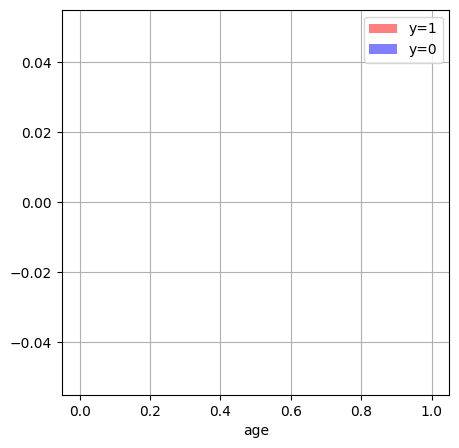

In [20]:
plt.figure(figsize=(5,5))
campaign[campaign['y']==1]['age'].hist(alpha = 0.5, color = 'red', bins= 50, label='y=1')
campaign[campaign['y']==0]['age'].hist(alpha = 0.5, color = 'blue', bins= 50, label='y=0')
plt.legend()
plt.xlabel('age')

## Address quality issues


### Manipulate data


In [21]:
# check for duplicates in our data
campaign.duplicated().sum()
#1487

1487

In [22]:
# drop duplicate
campaign.drop_duplicates(inplace=True)

In [23]:
# idetify target features before we do the Dummy
# deleted - default we do not need it
# fix education number 1 2 3 4 ? or figure out how to handle it
# fix month to 1 - 12
# fix day of the week to 1-7

In [24]:
#check default value counts
# always run a value count before you delete
campaign.default.value_counts()

no         28125
unknown     7454
yes            3
Name: default, dtype: int64

In [25]:
#campaign['default'] =campaign['default'].map({'no':0,'yes':1,'unknown':0})
#campaign['y'] = campaign['y'].map({'no':0,'yes':1})

In [26]:
# changed no 0 and yes 1
campaign.replace({'no:0', 'yes:1'}, inplace=True)

In [27]:
# Drop duplicates
# c.drop_duplicates(inplace=True)
#c.duplicated().sum()
# c.default.value_counts()
# c.replace({'no':0,'yes':1},inplace=True)
# c.columns.values


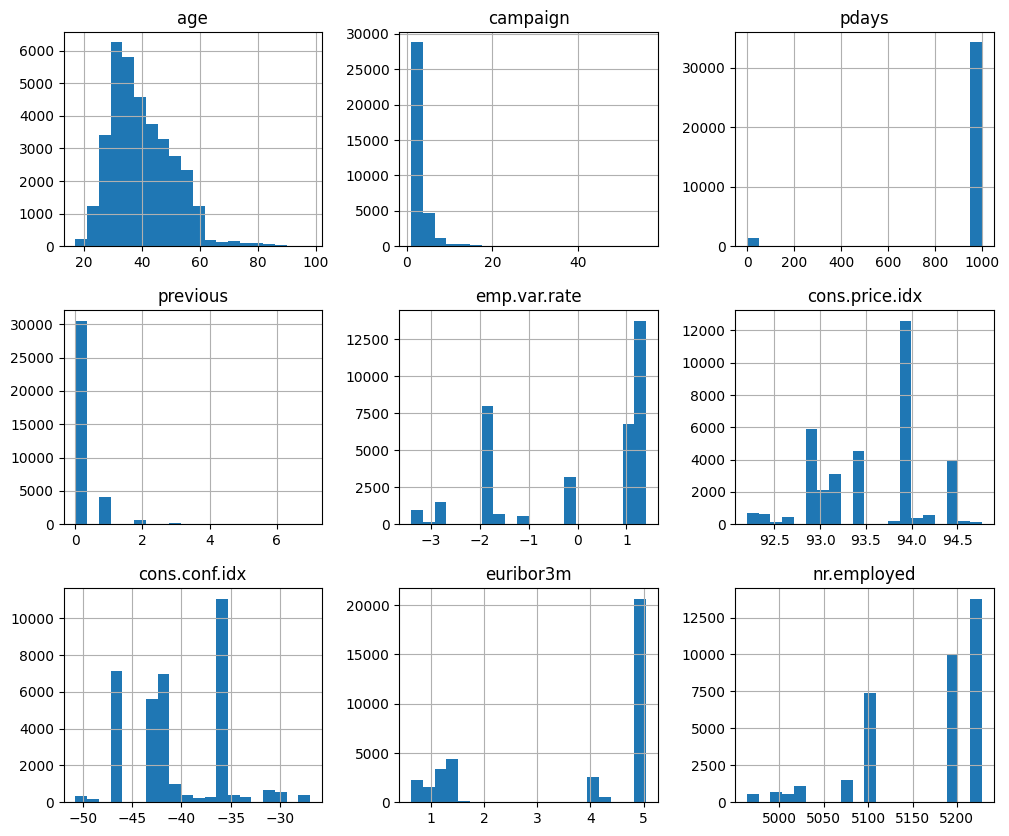

In [28]:
campaign.hist(bins=20, figsize=(12,10))
plt.show()

In [ ]:
# HOW TO HANDLE OUTLIERS

In [ ]:
# visualize the categorical features

In [29]:
campaign.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'], dtype=object)

In [ ]:
# drop all values that we dont need

In [ ]:
# filter data for default we dont need them dropt them
#campaign_clean = campaign.drop(columns='default')

In [30]:
# teachers notes signed up yes or not campaign variables number of contanct
campaign.groupby('y')['campaign'].value_counts(normalize=True)
# some people were contacted over 56 times

y    campaign
no   1           0.405528
     2           0.260842
     3           0.133287
     4           0.067821
     5           0.041871
     6           0.024995
     7           0.016462
     8           0.011081
     9           0.007897
     10          0.006209
     11          0.004904
     12          0.003471
     13          0.002452
     14          0.001719
     17          0.001465
     15          0.001433
     16          0.001401
     18          0.000955
     20          0.000923
     19          0.000828
     21          0.000669
     22          0.000541
     23          0.000414
     24          0.000414
     27          0.000318
     29          0.000318
     25          0.000223
     28          0.000223
     30          0.000223
     31          0.000223
     26          0.000191
     35          0.000159
     33          0.000127
     32          0.000096
     34          0.000064
     40          0.000064
     42          0.000064
     37          0.00003

In [31]:
campaign[['day_of_week','y']].head()

,day_of_week,y
0,mon,no
1,mon,no
2,mon,no
3,mon,no
4,mon,no


In [32]:
yes = campaign[campaign['y']=='yes']
yes['day_of_week'].value_counts()
# thursday has the most yes

thu    950
wed    854
tue    851
fri    762
mon    759
Name: day_of_week, dtype: int64

In [33]:
# check for changes
campaign.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [34]:
# if we want to know only the unknowns
unknown_count = campaign.eq('unknown').sum().to_frame('Count')
unknown_count
# do we want to keep uknowns?

,Count
age,0
job,291
marital,68
education,1498
default,7454
housing,885
loan,885
contact,0
month,0
day_of_week,0


In [35]:
campaign[campaign['marital'] == "unknown"]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
352,59,retired,unknown,university.degree,unknown,no,no,telephone,may,tue,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
373,57,retired,unknown,basic.4y,no,no,no,telephone,may,tue,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1345,33,services,unknown,high.school,no,yes,yes,telephone,may,thu,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1445,32,unknown,unknown,university.degree,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,yes
3132,37,management,unknown,high.school,no,no,no,telephone,may,thu,6,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34685,31,entrepreneur,unknown,university.degree,no,no,no,cellular,oct,thu,1,999,0,nonexistent,-3.4,92.431,-26.9,0.722,5017.5,yes
34709,31,entrepreneur,unknown,university.degree,no,yes,no,telephone,oct,thu,4,999,1,failure,-3.4,92.431,-26.9,0.722,5017.5,no
35383,30,technician,unknown,university.degree,no,no,no,cellular,mar,mon,2,11,2,success,-1.8,93.369,-34.8,0.639,5008.7,yes
35384,30,technician,unknown,university.degree,no,no,no,cellular,mar,mon,2,6,2,success,-1.8,93.369,-34.8,0.639,5008.7,yes


In [36]:
campaign.drop(campaign[campaign['marital']== "unknown"].index, inplace=True)
campaign.shape

(35514, 20)

In [37]:
campaign[campaign['default'] == "yes"].shape

(3, 20)

In [38]:
# Identify features
#Checking out the categories and their respective counts in each feature - running it through a for loop
for col in campaign.select_dtypes(include='object').columns:
    print(col, "column")
    print("Number of unique:", campaign[col].nunique())
    print(campaign[col].value_counts(), '\n')

job column
Number of unique: 12
admin.           8936
blue-collar      7965
technician       5767
services         3400
management       2558
retired          1498
entrepreneur     1267
self-employed    1241
housemaid         937
unemployed        889
student           772
unknown           284
Name: job, dtype: int64 

marital column
Number of unique: 3
married     21581
single       9925
divorced     4008
Name: marital, dtype: int64 

education column
Number of unique: 8
university.degree      10408
high.school             8221
basic.9y                5198
professional.course     4549
basic.4y                3614
basic.6y                2018
unknown                 1490
illiterate                16
Name: education, dtype: int64 

default column
Number of unique: 3
no         28068
unknown     7443
yes            3
Name: default, dtype: int64 

housing column
Number of unique: 3
yes        18606
no         16024
unknown      884
Name: housing, dtype: int64 

loan column
Number of uniq

In [ ]:
# default means we do not want them to subscribe
#pd.crosstabl(c['default'],c['y'])

Does the data have any null values

If there are null h.replace('unknown',np.NaN,inplace=True)

In [ ]:
#campaign["education"]=campaign["education"].replace(["illiterate","basic.4y","basic.6y","basic.9y","high.school","professional.course","university.degree"],[1,2,3,4,5,6,7])
#campaign["education"].value_counts()
#campaign = pd.get_dummies(campaign,prefix=["job"],columns=["job"])
#campaign = pd.get_dummies(campaign,prefix=["marital"],columns=["marital"])
#campaign = pd.get_dummies(campaign,prefix=["contact"],columns=["contact"])
#campaign["job"] = campaign["job"].replace(["unemployed","student","services","housemaid","blue-collar","technician","admin.","management","self-employed","entrepreneur","retired"],[0,1,2,3,4,5,6,7,8,9,10])
#campaign["job"].value_counts()
#campaign['day_of_week'] = campaign['day_of_week'].replace(["mon","tue","wed","thu","fri"],[1,2,3,4,5])
#campaign['month'] = campaign['month'].replace(["jan","feb","mar","apr", "may","jun", "jul", "aug", "sep", "oct", "nov", "dec"],[1,2,3,4,5,6,7,8,9,10,11,12])
#print(campaign['day_of_week'].value_counts())
#print(campaign['month'].value_counts())


In [39]:
features_target =['age','month','day_of_week','campaign','y','education','housing' ,'loan','marital', 'contact','job','default']
campaign_features_target = campaign[features_target]
campaign_features_target.head(3)

# we need to condense education

,age,month,day_of_week,campaign,y,education,housing,loan,marital,contact,job,default
0,56,may,mon,1,no,basic.4y,no,no,married,telephone,housemaid,no
1,57,may,mon,1,no,high.school,no,no,married,telephone,services,unknown
2,37,may,mon,1,no,high.school,yes,no,married,telephone,services,no


### After we set features remove the Null Values


In [40]:
# clean up values we do not need
# replace unknowns with Nan
# both default and poutcome have so little useable data in comparison to missing data or such a poor balance of values
# that I don't think they are worth using in training.
# poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
# default: has credit in default? (categorical: "no","yes","unknown")



In [41]:
# Remove null values and check for null values
# Identify null values
campaign_features_target.isna().sum()

age            0
month          0
day_of_week    0
campaign       0
y              0
education      0
housing        0
loan           0
marital        0
contact        0
job            0
default        0
dtype: int64

In [42]:
# Remove null values , sometimes we will add a value for null values
# there are other methods so decide how you want to handle
campaign_features_target = campaign_features_target.dropna()

Null Values = figure out how to handle


In [43]:
# check for null values
campaign_features_target.isna().sum()

age            0
month          0
day_of_week    0
campaign       0
y              0
education      0
housing        0
loan           0
marital        0
contact        0
job            0
default        0
dtype: int64

In [ ]:
# Create a feature set and target set

In [44]:
# important seperate items
# feature items
# target item for this particular data set it is Y who signed up
# create two dataframes
y = campaign_features_target['y']
X = campaign_features_target.drop(columns= 'y')
X.head()

,age,month,day_of_week,campaign,education,housing,loan,marital,contact,job,default
0,56,may,mon,1,basic.4y,no,no,married,telephone,housemaid,no
1,57,may,mon,1,high.school,no,no,married,telephone,services,unknown
2,37,may,mon,1,high.school,yes,no,married,telephone,services,no
3,40,may,mon,1,basic.6y,no,no,married,telephone,admin.,no
4,56,may,mon,1,high.school,no,yes,married,telephone,services,no


In [45]:
# Convert categorical variables to one-hot encoding
campaign_features_target = pd.get_dummies(campaign, drop_first=True)


In [46]:
campaign_features_target.head(3)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,1,0,0


In [47]:
# Feature engineering - One-Hot Encoding - binary boolean option replace text with 1 or zero
#   watch out for the "Dummy Variable Trap"
# Encode our features and target as needed
# prep data set for categorical value - machine learning only uses values
# use get dummies on dataframe insert paramater
X = pd.get_dummies(X,drop_first= True)
X.head()

,age,campaign,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,default_unknown,default_yes
0,56,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,40,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,56,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [48]:
# Finding the unique values of y
# housing: has housing loan? (categorical: "no","yes","unknown")
# y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)
campaign['y'].unique()

array(['no', 'yes'], dtype=object)

In [49]:
import altair as alt
day = campaign_features_target.groupby(["day_of_week","y"])["day_of_week"].count()
day.head(15)

KeyError: ignored

#Train/Test Split Data
*   Create a holdout set by spliting the X and y sets into training and test sets
*   Normalize or Standardize the x train and test sets

Take data set and split it up to train and to test our model

* Create a hold out set by splitting the X and y sets into training test sets
* Normalize or standardize the x train and test sets
Do for every model to understand performance for our model

Split X and y sets into training and test sets take data set and split up and create a data set that will train our model and to test our model pass our future set and our target variable identify test size or split size or 80/20(need enough data for training), and then random state is a random seed value starting at a certain value to replicate results) We want to replicate our results

Model Selection: baseline models
In this section, we will first compare the performance of the following 7 machine learning models using default hyperparameters:

-K-nearest neighbors

-Logistic regression

-Stochastic gradient descent

-Naive Bayes

-Decision tree

-Random forest

-Gradient boosting classifier

In [ ]:
# plot raw data

In [ ]:
# normalize data set it 99 % of the time but not tree algorithms

In [50]:
# Split X and y sets into training and test sets
# Split our data into training and test data, with 30% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [51]:
# Use StandardScaler() to normolize data around a mean of 0
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
print(X_test_scaled)

[[-0.67738039 -0.57077544 -0.413379   ... -0.08960397 -0.51555567
  -0.00896996]
 [ 0.08254082 -0.57077544 -0.413379   ... -0.08960397  1.93965475
  -0.00896996]
 [-1.72227206 -0.21564437 -0.413379   ... -0.08960397 -0.51555567
  -0.00896996]
 ...
 [-0.48740009 -0.21564437 -0.413379   ... -0.08960397  1.93965475
  -0.00896996]
 [ 0.84246203  0.13948669 -0.413379   ... -0.08960397  1.93965475
  -0.00896996]
 [ 0.84246203 -0.57077544 -0.413379   ... -0.08960397 -0.51555567
  -0.00896996]]


How do we handle the categorical features? We need to encode them. Keep meaning intact

Example male = 1 female = 0

*Feature engineering *- one hot encoding , watch out for the dummy variable trap

Example:

X = pd.get_dummies(X, drop_first= True)

always include the drop first true value - drop the new column so we will not get duplicate informaiton - if we keep all new columns it will create noise. we only need one column for example for male and female
X.head()

# K nearest Neighbors(KNN)

KNN is used on categorical KNN is supervised learning while K-means is unsupervised

KNN is used for clustering, DT for classification. (Both are used for classification.)

KNN determines neighborhoods, so there must be a distance metric. This implies that all the features must be numeric. Distance metrics may be affected by varying scales between attributes and also high-dimensional space.

KNN is a classifier that makes predictions based on neighboring data points. It first finds the number of k neighbors with the shortest distance.

Then counts each class for those k neighbors and makes a predication based on the class with the hightest count.

(counts the neighbors for classification. So with data points we have a two features sets column1 and column2 with two categories - is our data blue or orange but we need to make predication if it is blue or orange- it will count the categories - we have more blue than orange and so the point is blue) counts neighbors this is called Euclidean distance.

Example: n_neighbors should not be even start with odd usually start with three - work our way up - look at accuracy and see how it improves. example

## KNN Normal

In [52]:
# Build the KNN model - empty model choose odd number 3 to 5
KNNclf = KNeighborsClassifier(n_neighbors = 3 )
# Train or Fit the KNN model insert training data set that has been normanized and the y train
KNNclf.fit(X_train_scaled, y_train)
# Make predictions on the x_test set using the trained model - use mode . predict pass test set through it
# result is y test predicatin
KNNtest_predictions = KNNclf.predict(X_test_scaled)

In [53]:
# Evaluate the model accuracy
# use various metrics 79% were correct
# models should not be 90 % high to start off double check work to see what is going on
accuracy_score(y_test, KNNtest_predictions)

0.865884561238855

In [54]:
# Data has a small imbalance
# count values in no and yes
y_train.value_counts()

no     21969
yes     2890
Name: y, dtype: int64

Look at accuracy and see how it improves.

example : Evaluate the model accuracy accuracy_score(y_test, KNNtest_predications)

compare the y_test - the answers to the actual data we are testing

Use accuracy score function

this will help us evualate our data

In [55]:
# display confusion matrix
confusion_matrix(y_test,KNNtest_predictions)

array([[8990,  388],
       [1041,  236]])

## Evaluate Models

What is a classification report?

It is a report that details the precision, recall, and accuracy of the predicted data points for each categorical class. A classification report can be used to determine the rate of false positives, false negatives, and the quality of the predictions.

***Precision:*** is the ratio of correctly predicted positive observations to the total predicted positive observations. High precision shows low false positives. TP / (TP + FP)

***Recall or Sensitivity:*** is the ratio of correctly pridicted positive observations to total actual positive observations. High recall shows low false negatives. TP / (TP + FN)
Specificity: is the ratio of correctly predicted negative observations to total actual negative observations. TN / (TN + FP)

A***ccuracy:*** how often the model is correct-the ratio of correctly predicted observations to the total number of observations. (TP + TN) / (TP +
TN + FP + FN)

***F1-score:*** is a weighted harmonic mean of precision and recall. 2*(Recall * Precision) / (Recall + Precision)

***Support: ***is the number of occurence of the given class in your measured dataset.
Macro-Avg: simple mean of the scores.
Weighted-Avg: average that factors in the count for each class.

In [56]:
# Display classification report
# the higher precision the lower the false positives
# increase precsion as much as possible
# recall the higher the lower the false
print(classification_report(y_test,KNNtest_predictions))

              precision    recall  f1-score   support

          no       0.90      0.96      0.93      9378
         yes       0.38      0.18      0.25      1277

    accuracy                           0.87     10655
   macro avg       0.64      0.57      0.59     10655
weighted avg       0.83      0.87      0.85     10655



In [ ]:
# Let's visualize the tree

In [ ]:
# example : Evaluate the model accuracy

Count the values to look at the data
This can check for imbalance
look at values in our training
look at our categories in our training.


In [ ]:
# example

random forest classifier algo works the best

## Random resampling oversampling Undersampling

In [57]:
## Random Undersampling
# oversampling is the process of creating more instances
# we need to balance the dataset
# or we can undersample
# instantiate the RadomUndersampler instance
rus = RandomUnderSampler(random_state = 1)

In [58]:
# fit the data to the resampler model
X_resampled, y_resampled = rus.fit_resample(X_train_scaled, y_train)

In [59]:
# count the distinct values
y_resampled.value_counts()

no     2890
yes    2890
Name: y, dtype: int64

In [60]:
# build the resampled model
# Build the KNN model - empty model choose odd number 3 to 5
KNNclf_resampled = KNeighborsClassifier(n_neighbors = 3 )
# Train or Fit the KNN model insert training data set that has been normanized and the y train
KNNclf_resampled.fit(X_resampled , y_resampled)
# Make predictions on the x_test set using the trained model - use mode . predict pass test set through it
# result is y test predicatin
KNNtest_pred_resampled  = KNNclf_resampled .predict(X_test_scaled)

In [61]:
# Evaluate the model accuracy
accuracy_score(y_test, KNNtest_pred_resampled)

0.6221492257156265

In [62]:
# Display classification report
# the higher precision the lower the false positives
# increase precsion as much as possible
# recall the higher the lower the false
print(classification_report(y_test,KNNtest_pred_resampled))

              precision    recall  f1-score   support

          no       0.93      0.62      0.74      9378
         yes       0.18      0.63      0.29      1277

    accuracy                           0.62     10655
   macro avg       0.55      0.63      0.51     10655
weighted avg       0.84      0.62      0.69     10655



## OverSampling


In [63]:
from imblearn.over_sampling import RandomOverSampler

# instantiate the _oversampler instance
random_oversampler = RandomOverSampler(random_state = 1)

# fit the data to the _oversampler model

X_oversampler, y_oversampler = random_oversampler.fit_resample(X_train_scaled, y_train)

# count the distinct values
y_oversampler.value_counts()

no     21969
yes    21969
Name: y, dtype: int64

In [64]:
# build the _oversampler model
# Build the KNN model - empty model choose odd number 3 to 5
KNNclf_oversampler = KNeighborsClassifier(n_neighbors = 3 )
# Train or Fit the KNN model insert training data set that has been normanized and the y train
KNNclf_oversampler.fit(X_oversampler , y_oversampler)
# Make predictions on the x_test set using the trained model - use mode . predict pass test set through it
# result is y test predicatin
KNNtest_pred_oversampler  = KNNclf_oversampler .predict(X_test_scaled)
# Evaluate the model accuracy
accuracy_score(y_test, KNNtest_pred_oversampler)

0.7776630689816987

In [65]:
# Display classification report
# the higher precision the lower the false positives
# increase precsion as much as possible
# recall the higher the lower the false
print(classification_report(y_test,KNNtest_pred_oversampler))

              precision    recall  f1-score   support

          no       0.91      0.83      0.87      9378
         yes       0.23      0.38      0.29      1277

    accuracy                           0.78     10655
   macro avg       0.57      0.60      0.58     10655
weighted avg       0.83      0.78      0.80     10655



In [66]:
# evaluate the model accuracy
print(f'Original model: {accuracy_score(y_test, KNNtest_predictions)}')
# print(f'Undersampling model: {accuracy_score(y_test, KNNtest_pred_resampled)}')
print(f'Oversampling model: {accuracy_score(y_test, KNNtest_pred_oversampler)}')

Original model: 0.865884561238855
Oversampling model: 0.7776630689816987


# Decision Trees
Tree-based algorithms are supervised learning methods that are mostly used for classifications and regression problems. The decision logic can be traced throughout each step of the model to see how the model reached the final prediction.

There are some key concepts that are important to know when working with decision trees:

* Root Node: A node that is divided into two or more homogeneous sets and represents the entire population or sample data.
* Parent Node: A node that is divided into sub-nodes.
* Child Node: Sub-nodes of a parent node.
* Decision Node: A sub-node that is split into further sub-nodes.
* Leaf or Terminal Node: Nodes that do not split.
* Branch or Sub-Tree: A subsection of the entire tree.
* Splitting: The process of dividing a node into two or more sub-nodes.
* Pruning: The process of removing sub-nodes of a decision node.
* Tree's Depth: The number of decision nodes encountered before making a decision.


## Decision Tree Normal

In [67]:
# Build the decision tree model
treeclf = DecisionTreeClassifier()

# Train or Fit the decision tree model
treeclf.fit(X_train_scaled, y_train)

# Make predictions on the x_test set using the trained model
treetest_predictions = treeclf.predict(X_test_scaled)

In [68]:
# Display confusion matrix
confusion_matrix(y_test, treetest_predictions)

array([[8357, 1021],
       [ 963,  314]])

In [69]:
# Display classification report
# the higher precision the lower the false positives
# increase precsion as much as possible
# recall the higher the lower the false
print(classification_report(y_test,treetest_predictions))

              precision    recall  f1-score   support

          no       0.90      0.89      0.89      9378
         yes       0.24      0.25      0.24      1277

    accuracy                           0.81     10655
   macro avg       0.57      0.57      0.57     10655
weighted avg       0.82      0.81      0.82     10655



In [70]:
print(f'Original model: {accuracy_score(y_test, KNNtest_predictions)}')
print(f'Undersampling model: {accuracy_score(y_test, KNNtest_pred_resampled)}')
print(f'Oversampling model: {accuracy_score(y_test, KNNtest_pred_oversampler)}')
print(f'Decision Tree model: {accuracy_score(y_test, treetest_predictions)}')

Original model: 0.865884561238855
Undersampling model: 0.6221492257156265
Oversampling model: 0.7776630689816987
Decision Tree model: 0.8137963397465978


In [71]:
# @title
# Display classification report
# the higher precision the lower the false positives
# increase precsion as much as possible
# recall the higher the lower the false
print(classification_report(y_test,treetest_predictions))

              precision    recall  f1-score   support

          no       0.90      0.89      0.89      9378
         yes       0.24      0.25      0.24      1277

    accuracy                           0.81     10655
   macro avg       0.57      0.57      0.57     10655
weighted avg       0.82      0.81      0.82     10655



In [ ]:
# Let's visualize the tree
fig, ax = plt.subplots(figsize=(5,5))
tree.plot_tree(treeclf, fontsize=10, feature_names=X.columns)
plt.show()

## Decision Tree Random Sampling

In [ ]:
# Build the decision tree model
treeclf_resampled = DecisionTreeClassifier()
# Train or Fit the decision tree model
treeclf_resampled.fit(X_resampled , y_resampled)
# Make predictions on the x_test set using the trained model
treetest_pred_resampled = treeclf_resampled.predict(X_test_scaled)
# Display confusion matrix
confusion_matrix(y_test, treetest_pred_resampled)

In [ ]:

print(classification_report(y_test, treetest_pred_resampled))

In [ ]:
print(f'Original model: {accuracy_score(y_test, KNNtest_predictions)}')
print(f'Undersampling model: {accuracy_score(y_test, KNNtest_pred_resampled)}')
print(f'Oversampling model: {accuracy_score(y_test, KNNtest_pred_oversampler)}')
print(f'Decision Tree model: {accuracy_score(y_test, treetest_predictions)}')
print(f'Decision Tree Undersampling model: {accuracy_score(y_test, treetest_pred_resampled)}')

## Decision Tree Oversampling

In [ ]:
# Build the decision tree model
treeclf_oversampler = DecisionTreeClassifier()
# Train or Fit the decision tree model
treeclf_oversampler.fit(X_oversampler, y_oversampler)
# Make predictions on the x_test set using the trained model
treetest_pred_oversampler = treeclf_oversampler.predict(X_test_scaled)
# Display confusion matrix
confusion_matrix(y_test, treetest_pred_oversampler)

In [ ]:
print(classification_report(y_test, treetest_pred_oversampler))

In [ ]:
print(f'Original model: {accuracy_score(y_test, KNNtest_predictions)}')
print(f'Undersampling model: {accuracy_score(y_test, KNNtest_pred_resampled)}')
print(f'Oversampling model: {accuracy_score(y_test, KNNtest_pred_oversampler)}')
print(f'Decision Tree model: {accuracy_score(y_test, treetest_predictions)}')
print(f'Decision Tree Undersampling model: {accuracy_score(y_test, treetest_pred_resampled)}')
print(f'Decision Tree oversampling model: {accuracy_score(y_test, treetest_pred_oversampler)}')

#Random forest


We first create an instance of the Random Forest model, with the default parameters. We then fit this to our training data. We pass both the features and the target variable, so the model can learn.

https://www.datacamp.com/tutorial/random-forests-classifier-python

## Random Forest Normal

In [ ]:
# Normal
# build the random forest
rf = RandomForestClassifier()
# Train or Fit the decision tree model
rf.fit(X_train_scaled, y_train)
# Make predictions on the x_test set using the trained model
rf_predictions = rf.predict(X_test_scaled)
y_pred = rf.predict(X_test_scaled)

At this point, we have a trained Random Forest model, but we need to find out whether it is making accurate predictions.

In [ ]:
# Display confusion matrix
confusion_matrix(y_test, rf_predictions)

In [ ]:
print(classification_report(y_test, rf_predictions))

The simplest way to evaluate this model is using accuracy; we check the predictions against the actual values in the test set and count up how many the model got right.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
# evaluate the model accuracy
print(f'Original model: {accuracy_score(y_test, KNNtest_predictions)}')
print(f'Undersampling model: {accuracy_score(y_test, KNNtest_pred_resampled)}')
print(f'Oversampling model: {accuracy_score(y_test, KNNtest_pred_oversampler)}')
print(f'Decision Tree model: {accuracy_score(y_test, treetest_predictions)}')
print(f'Decision Tree Undersampling model: {accuracy_score(y_test, treetest_pred_resampled)}')
print(f'Decision Tree oversampling model: {accuracy_score(y_test, treetest_pred_oversampler)}')
print(f'Random Forest model: {accuracy_score(y_test, rf_predictions)}')

In [ ]:
# We can use the following code to visualize our first 3 trees.
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

## Random Forest OverSampling

In [ ]:
# build the random forest
rf_oversampler = RandomForestClassifier()
# Train or Fit the decision tree model
rf_oversampler.fit(X_oversampler, y_oversampler)
# Make predictions on the x_test set using the trained model
rf_pred_oversampler = rf_oversampler.predict(X_test_scaled)
y_pred = rf_oversampler.predict(X_test_scaled)

In [ ]:
# Display confusion matrix
confusion_matrix(y_test, rf_pred_oversampler)

In [ ]:
print(classification_report(y_test, rf_pred_oversampler))

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
# evaluate the model accuracy
print(f'Original model: {accuracy_score(y_test, KNNtest_predictions)}')
print(f'Undersampling model: {accuracy_score(y_test, KNNtest_pred_resampled)}')
print(f'Oversampling model: {accuracy_score(y_test, KNNtest_pred_oversampler)}')
print(f'Decision Tree model: {accuracy_score(y_test, treetest_predictions)}')
print(f'Decision Tree Undersampling model: {accuracy_score(y_test, treetest_pred_resampled)}')
print(f'Decision Tree oversampling model: {accuracy_score(y_test, treetest_pred_oversampler)}')
print(f'Random Forest model: {accuracy_score(y_test, rf_predictions)}')
print(f'Random Forest oversampling model: {accuracy_score(y_test, rf_pred_oversampler)}')

##Random Forest with oversampling Example 2

In [ ]:
# before oversampling
print("counts of label '1': {}".format(sum(y_train == 1)))
print("counts of label '0': {} \n".format(sum(y_train == 0)))

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# Normal
# build the random forest
rf2_oversampler = RandomForestClassifier()
# Train or Fit the decision tree model
rf2_oversampler.fit(X_oversampler, y_oversampler)
# Make predictions on the x_test set using the trained model
rf2_oversampler_predictions = rf2_oversampler.predict(X_test_scaled)
y_pred = rf2_oversampler.predict(X_test_scaled)

In [ ]:
# Display confusion matrix
confusion_matrix(y_test, rf2_oversampler_predictions)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
# Display classification report
# the higher precision the lower the false positives
# increase precsion as much as possible
# recall the higher the lower the false
print(classification_report(y_test,rf2_oversampler_predictions))

In [ ]:
# evaluate the model accuracy
print(f'Original model: {accuracy_score(y_test, KNNtest_predictions)}')
print(f'Undersampling model: {accuracy_score(y_test, KNNtest_pred_resampled)}')
print(f'Oversampling model: {accuracy_score(y_test, KNNtest_pred_oversampler)}')
print(f'Decision Tree model: {accuracy_score(y_test, treetest_predictions)}')
print(f'Decision Tree Undersampling model: {accuracy_score(y_test, treetest_pred_resampled)}')
print(f'Decision Tree oversampling model: {accuracy_score(y_test, treetest_pred_oversampler)}')
print(f'Random Forest model: {accuracy_score(y_test, rf_predictions)}')
print(f'Random Forest oversampling model: {accuracy_score(y_test, rf_pred_oversampler)}')
print(f'Random Forest oversampling 2 model: {accuracy_score(y_test, rf2_oversampler_predictions)}')

## Random Forest Normal n_estimators and max_depth

In [ ]:
# decide how to pick the n estimator it is the number of decision trees in the forest
# max depth is the number of splits tht each decision tree is allowed to make to low underfits
# to high overfits generally we go with a max depth of 3, 5, 7
# Note: By applying bootstrap, the data set is split into in-bag and out-of-bag(OOB)
# data sets. This removes the need for creating a validation dataset.

### Example Set Up

In [ ]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True)
rf.fit(X_train_scaled, y_train)

In [ ]:
# now print out of bag score for this fit
print(rf.oob_score_)

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_estimators':np.arange(50,200,15),
              'max_features':np.arange(0.1, 1, 0.1),
              'max_depth': [3, 5, 7, 9],
              'max_samples': [0.3, 0.5, 0.8]}

rf = RandomizedSearchCV(RandomForestClassifier(), param_grid, n_iter = 15).fit(X_train_scaled, y_train)
rf = rf.best_estimator_

## RF Normal N and Max

In [ ]:
#rf.fit(X,y)
# find the most important features
importances = rf.feature_importances_

In [ ]:
std = np.std([tree.feature_importances_ for tree in rf.estimator_], axis=0)
indices = np.argsort(importances)[::1]

# print the feature ranking
print("Feature Ranking")
for f in range(X_train_scaled.shape[1]):
  print("%d. feature %d (%f)" % ( f+ 1, indices[f], importances[indices[f]]))

In [ ]:
y_pred = rf.predict(X_test_scaled)

In [ ]:
# Random Forest with n_estimators and max_depth

param_dist = {'n_estimators': randint(50,100), # i need to figure this out
             'max_depth': randint(1,7)} # i need to figure this out
 #param_dist = {'n_estimators': 100,'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

More Evaluation Metrics
Let’s look at the confusion matrix. This plots what the model predicted against what the correct prediction was. We can use this to understand the tradeoff between false positives (top right) and false negatives(bottom left) We can plot the confusion matrix using this code:




In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

We should also evaluate the best model with accuracy, precision, and recall (note your results may differ due to randomization)

In [ ]:
#y_pred = knn.predict(X_test)

#accuracy = accuracy_score(y_test, y_pred)
#precision = precision_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)

#print("Accuracy:", accuracy)
#print("Precision:", precision)
#print("Recall:", recall)
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

The below code plots the importance of each feature, using the model’s internal score to find the best way to split the data within each decision tree.

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

#Model -> Fit -> Predict

### Visualizing the Results



In [ ]:
# We can use the following code to visualize our first 3 trees.
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

RandomizedSearchCV will train many models (defined by n_iter_ and save each one as variables, the code below creates a variable for the best model and prints the hyperparameters. In this case, we haven’t passed a scoring system to the function, so it defaults to accuracy. This function also uses cross validation, which means it splits the data into five equal-sized groups and uses 4 to train and 1 to test the result. It will loop through each group and give an accuracy score, which is averaged to find the best model.

In [ ]:
rf = RandomForestClassifier()
# fitting the model
rf.fit(X_train,y_train)
accuracy_rf, recall_rf, Specificity_rf, Precision_rf, F1_score_rf, Balanced_Accuracy_rf = model_rf_perf = model_perf_to_lst(rf, X_test, y_test)

##Build the train

import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)

# Submitted

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import pickle
campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')


In [ ]:
#look at the file I read in
campaign.head(3)

In [ ]:
#What kind of data is in each column?
# look at the columns to see about non null and types
campaign.info()
# no empty columns

In [ ]:
# Do any of the columns have missing values? No missing values just NaN
campaign.nunique()

In [ ]:
campaign.isna().sum()

In [ ]:
# @title
campaign.hist('age','y',)
# looks like from 25 - 40 said yes and said no

In [ ]:
campaign.hist('day_of_week','y')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
# Transform catigorial data into numerical data
campaign_numerical = pd.get_dummies(campaign, columns=['day_of_week', 'month', 'contact', 'housing', 'education', 'marital', 'job'])
# Transform the target column into numerical data
mapping = {'yes': 1, 'no': 0}
campaign_numerical['y'] = campaign_numerical['y'].map(mapping)
# Split data into features and target
features, target = campaign_numerical.drop(['default', 'pdays', 'loan', 'previous', 'euribor3m', 'nr.employed', 'housing_unknown', 'education_unknown', 'marital_unknown', 'job_unknown', 'y', 'poutcome'], axis=1), campaign_numerical['y']
# Split training data and testing data
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)
# Train the model
model = RandomForestClassifier(random_state=42) # Accuracy: 0.88 | Precision: 0.70 | Recall: 0.62 | F1 Score: 0.65
model.fit(feature_train, target_train)

// see the et of numbers of the treest



In [ ]:

# Have the model make predictions
model_pred = model.predict(feature_test)
#save the model as pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
# Metrics
print("Accuracy:", accuracy_score(target_test, model_pred))
print("Precision:", precision_score(target_test, model_pred, average='macro'))
print("Recall:", recall_score(target_test, model_pred, average='macro'))
print("F1 Score:", f1_score(target_test, model_pred, average='macro'))
# Feature Importance
importances = model.feature_importances_
# Get the list of feature names
feature_names = features.columns.tolist()
# Sort feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]
# Plot feature importances
plt.figure(figsize=(20, 7))
plt.title("Feature Importances")
plt.bar(range(features.shape[1]), importances[indices], align="center")
plt.xticks(range(features.shape[1]), np.array(feature_names)[indices], rotation=45)
plt.xlim([-1, features.shape[1]])
plt.tight_layout()
plt.show()
# Generate the confusion matrix
c_matrix = confusion_matrix(target_test, model_pred)
# displays a text confusion matrix
print(c_matrix)
# If you want to visualize the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(c_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import pickle
# loads from a string
s = pickle.dumps(model)
clf2 = pickle.loads(s)

In [ ]:

# assesing model's performance with the mini holdout set
mini = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv')
column_order = features.columns.tolist()
mini = pd.DataFrame(mini)

mini_encoded = pd.get_dummies(mini, columns=['day_of_week', 'month', 'contact', 'housing', 'education', 'marital', 'job'])
mini_encoded = mini_encoded.drop(['default', 'pdays', 'loan', 'previous', 'euribor3m', 'nr.employed', 'housing_unknown', 'education_unknown', 'marital_unknown', 'job_unknown', 'poutcome'], axis=1)
mini_encoded = mini_encoded[column_order]
mapping = {'yes': 1, 'no': 0}
#mini_encoded.info()
#features.info()


In [ ]:
# formatting mini holdout to match the format of the dataframe our model was trained on
# creating a copy of our campaign dataframe, encoding categorical features
model_pred_holdout = model.predict(mini_encoded)
model_pred_holdout = pd.DataFrame(model_pred_holdout)
# no y feature column to let us know if the predictions are correct or not in the holdout set
#mini_holdout_ground_truth = mini[?]
model_pred_holdout.rename(columns={0:'predictions' }, inplace=True)
model_pred_holdout.to_csv('model_pred_holdout.csv', index=False)
model_pred_holdout

#print("Accuracy:", accuracy_score(model_pred_holdout))
#print(f"Mini Holdout Accuracy: {accuracy:.2f}")

In [ ]:
from pathlib import Path
filepath = Path('out.csv')
filepath.parent.mkdir(exist_ok=True)

predict = clf2.predict(mini_encoded)
df = pd.DataFrame(predict, columns=["predictions"])

df.to_csv(filepath, index=False)

In [ ]:
with open('/content/model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predictions = loaded_model.predict(mini_encoded)
df = pd.DataFrame(predictions, columns=["predictions"])

df.to_csv(filepath, index=False)

#model_pred_holdout = pd.DataFrame(model_pred_holdout)
# no y feature column to let us know if the predictions are correct or not in the holdout set
#mini_holdout_ground_truth = mini[?]
#model_pred_holdout.to_csv('model_pred_holdout.csv', index=False)
#model_pred_holdout


# Edit submitted workd


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import pickle
campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')


In [ ]:
#look at the file I read in
campaign.head(3)

In [ ]:
#What kind of data is in each column?
# look at the columns to see about non null and types
campaign.info()
# no empty columns

In [ ]:
# Do any of the columns have missing values? No missing values just NaN
campaign.nunique()

In [ ]:
campaign.isna().sum()

In [ ]:
# @title
campaign.hist('age','y',)
# looks like from 25 - 40 said yes and said no

In [ ]:
campaign.hist('day_of_week','y')

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modeling
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from scipy.stats import randint
import seaborn as sns

# Tree Visualisation
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

# Transform catigorial data into numerical data
campaign_numerical = pd.get_dummies(campaign, columns=['day_of_week', 'month', 'contact', 'housing', 'education', 'marital', 'job'])
# Transform the target column into numerical data
mapping = {'yes': 1, 'no': 0}
campaign_numerical['y'] = campaign_numerical['y'].map(mapping)




In [ ]:
# Split data into features and target
features, target = campaign_numerical.drop(['default', 'pdays', 'loan', 'previous', 'euribor3m', 'nr.employed', 'housing_unknown', 'education_unknown', 'marital_unknown', 'job_unknown', 'y', 'poutcome'], axis=1), campaign_numerical['y']

# Split training data and testing data feature x_train = features y = targets
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(max_depth = 2, random_state=42) # Accuracy: 0.88 | Precision: 0.70 | Recall: 0.62 | F1 Score: 0.65
model.fit(feature_train, target_train)
# Have the model make predictions
model_pred = model.predict(feature_test)


In [ ]:
# Feature Importance
importances = model.feature_importances_
# Get the list of feature names
feature_names = features.columns.tolist()
# Sort feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]


In [ ]:
#save the model as pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
# Metrics
print("Accuracy:", accuracy_score(target_test, model_pred))
print("Precision:", precision_score(target_test, model_pred, average='macro'))
print("Recall:", recall_score(target_test, model_pred, average='macro'))
print("F1 Score:", f1_score(target_test, model_pred, average='macro'))


In [ ]:
for i in range(3):
    tree = model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=feature_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

In [ ]:
# Plot feature importances
plt.figure(figsize=(20, 7))
plt.title("Feature Importances")
plt.bar(range(features.shape[1]), importances[indices], align="center")
plt.xticks(range(features.shape[1]), np.array(feature_names)[indices], rotation=45)
plt.xlim([-1, features.shape[1]])
plt.tight_layout()
plt.show()
# Generate the confusion matrix
c_matrix = confusion_matrix(target_test, model_pred)
# displays a text confusion matrix
print(c_matrix)
# If you want to visualize the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(c_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import pickle # this is another way to do this without having open in the code above
# loads from a string
s = pickle.dumps(model)
clf2 = pickle.loads(s)

In [ ]:

# assesing model's performance with the mini holdout set
mini = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv')
column_order = features.columns.tolist()
mini = pd.DataFrame(mini)

mini_encoded = pd.get_dummies(mini, columns=['day_of_week', 'month', 'contact', 'housing', 'education', 'marital', 'job'])
mini_encoded = mini_encoded.drop(['default', 'pdays', 'loan', 'previous', 'euribor3m', 'nr.employed', 'housing_unknown', 'education_unknown', 'marital_unknown', 'job_unknown', 'poutcome'], axis=1)
mini_encoded = mini_encoded[column_order]
mapping = {'yes': 1, 'no': 0}
#mini_encoded.info()
#features.info()


In [ ]:
# formatting mini holdout to match the format of the dataframe our model was trained on
# creating a copy of our campaign dataframe, encoding categorical features
model_pred_holdout = model.predict(mini_encoded)
model_pred_holdout = pd.DataFrame(model_pred_holdout)
# no y feature column to let us know if the predictions are correct or not in the holdout set
#mini_holdout_ground_truth = mini[?]
model_pred_holdout.rename(columns={0:'predictions' }, inplace=True)
model_pred_holdout.to_csv('model_pred_holdout.csv', index=False)
model_pred_holdout

#print("Accuracy:", accuracy_score(model_pred_holdout))
#print(f"Mini Holdout Accuracy: {accuracy:.2f}")

In [ ]:
from pathlib import Path # double work not needed but this is another way
filepath = Path('out.csv')
filepath.parent.mkdir(exist_ok=True)

predict = clf2.predict(mini_encoded)
df = pd.DataFrame(predict, columns=["predictions"])

df.to_csv(filepath, index=False)

In [ ]:
with open('/content/model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predictions = loaded_model.predict(mini_encoded)
df = pd.DataFrame(predictions, columns=["predictions"])

df.to_csv(filepath, index=False)

#model_pred_holdout = pd.DataFrame(model_pred_holdout)
# no y feature column to let us know if the predictions are correct or not in the holdout set
#mini_holdout_ground_truth = mini[?]
#model_pred_holdout.to_csv('model_pred_holdout.csv', index=False)
#model_pred_holdout


# teachers Testing


Prep work:

*   Download team csv predictions file
*   Rename files to team8-module2-predictions.csv where team8 is the name of your team
*   Make sure file is one column and remove any extra columns
*   Make sure the heading is set to "predictions" (without quotes)
*   Upload csv predictions to session storage area.
    *     Click the folder icon, then click the upload icon (paper with an upward arrow)
*   Run the notebook (Runtime -> Run all)






In [ ]:
# MODULE 02 - BANK HOLDOUT GRADING

from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

blue_score = 650
orange_score = 300

# READ IN THE CSV FILES
team_dir = Path("./")
teams = team_dir.glob("*-predictions.csv")
team_list = []
for team in teams:
  # print(latent_file)
  team_list.append((str(team).split("-",1)[0],team))

# print(team_list)

In [ ]:
# READ IN THE MINI HOLDOUT ANSWERS
targets_file = "https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini_answers.csv"
targets = pd.read_csv(targets_file)
# targets

In [ ]:
# ARE THE STUDENT DATASETS THE CORRECT LENGTH
student_datasets = {}
for (group, file) in team_list:
  ds = pd.read_csv(file)

  if len(ds) != len(targets):
    print(f"Error group {group} ds had {len(ds)} rows instead of the expected {len(targets)}. It will be excluded.")
  else:
    student_datasets[group] = ds
    print(f"Group {group} added successfully")

In [ ]:
# student_datasets

In [ ]:
def recommended_grade(amount):
  '''
  A simple min max scaler to identify a recommended score for the holdout set
  '''
  min_allowed = orange_score
  max_allowed = blue_score
  if amount>max_allowed:
    return 100
  elif amount<min_allowed:
    return 0
  else:
    return (amount - min_allowed) / (max_allowed - min_allowed)*100


In [ ]:
def value_of_calls(incorrect_calls, correct_calls):
  '''
  This function is based on assumptions about bank employee wages, time requirements,
  average savings amounts, and net interest margin. Wages, average savings, and net interest margin,
  were pulled from the time range of the dataset. Assumptions were made about time on call and the
  percentage of a person's total savings they'd be willing to put into a term deposit.
  '''
  time_on_call = .5
  wage = -11 # minimum wage is 6.50 and typicall teller wage is 11
  call_cost = wage*time_on_call
  average_savings = 4960
  percent_in_term_deposit = .75
  net_interest_margin = .012
  positive_call_benefit = average_savings*percent_in_term_deposit*net_interest_margin
  total_earned = incorrect_calls*call_cost + correct_calls*call_cost + correct_calls*positive_call_benefit
  return total_earned


In [ ]:
results_dict = {}

In [ ]:
for group, student_ds in student_datasets.items():
  student_dict = {}
  cm = confusion_matrix(student_ds, targets)
  # print(group,cm)
  student_dict["Incorrect Calls"] = cm[1][0]
  student_dict["Correct Calls"] = cm[1][1]
  student_dict["Value of Calls"] = value_of_calls(cm[1][0],cm[1][1])
  student_dict["Estimated Grade"] = recommended_grade(student_dict['Value of Calls'])

  results_dict[group] = student_dict

In [ ]:
# results_dict

In [ ]:
results_df = pd.DataFrame(results_dict)
results_ds_trans = results_df.transpose()
results_ds_trans = results_ds_trans.drop(columns=["Estimated Grade"])
results_ds_trans = results_ds_trans.round(2)
results_ds_trans = results_ds_trans.sort_values(by="Value of Calls",ascending=False)
# results_ds_trans.to_csv("class_results.csv")
# results_ds_trans

In [ ]:
# GENERATE GRAPHICS FOR TEAMS
# THESE CAN BE SHARED WITH THE STUDENTS

graph = sns.barplot(data=results_ds_trans,y="Value of Calls",x=results_ds_trans.index)
graph.set_title("Amount Earned by Team")
graph.axhline(blue_score)
for bar in graph.patches:
    if bar.get_height() > blue_score:
        bar.set_color('tab:blue')
    elif bar.get_height() <0:
      bar.set_color('tab:red')
    elif bar.get_height() < orange_score:
      bar.set_color('tab:orange')
    else:
        bar.set_color('tab:grey')
#The plot is shown
plt.show()
results_ds_trans